In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline 

In [2]:
from keras.datasets import cifar10

In [3]:
# Load the Dataset 
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 28s 0us/step


In [34]:
# Scaling the Dataset 
X_train = X_train/X_train.max()
X_test  = X_test/X_test.max()
X_test.shape
#X_test.max()

(10000, 32, 32, 3)

In [12]:
# One hot encoding for the categorical data 
from keras.utils import to_categorical

In [13]:
Y_train_cat = to_categorical(Y_train,10)
Y_test_cat = to_categorical(Y_test,10)

In [14]:
# Now build the model 
from keras.models import Sequential

In [16]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

# Add covolutional layers 
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop', metrics = ['accuracy'])  



In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [21]:
model.fit(X_train, Y_train_cat, verbose = 1 , epochs = 10)

Epoch 1/10
50000/50000 [==============================] - 62s 1ms/step - loss: 1.4651 - acc: 0.4767
Epoch 2/10
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0906 - acc: 0.6202
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.9267 - acc: 0.6802
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8136 - acc: 0.7240
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.7256 - acc: 0.7525
Epoch 6/10
50000/50000 [==============================] - 70s 1ms/step - loss: 0.6575 - acc: 0.7805
Epoch 7/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.5981 - acc: 0.8000
Epoch 8/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.5580 - acc: 0.8151
Epoch 9/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.5228 - acc: 0.8279
Epoch 10/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.4886 - acc: 0.8390

In [23]:
model.metrics_names

['loss', 'acc']

In [25]:
model.evaluate(X_test,Y_test_cat)

10000/10000 [==============================] - 7s 722us/step


[1.4488324482440949, 0.7007]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
predictions = model.predict_classes(X_test)
predictions
#print(classification_report(Y_test,predictions))

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

Prediction (Softmax) from the neural network:

 [[5.0760466e-03 5.5290826e-07 4.2483567e-05 7.4378967e-01 2.3248969e-03
  2.4677765e-01 1.0447002e-03 2.8024278e-05 9.1378123e-04 2.1794285e-06]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




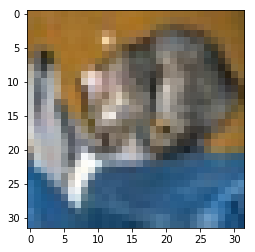



Final Output: 3


In [36]:
example = X_test[0]
prediction = model.predict(example.reshape(1,32,32,3))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(32,32,3), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))